## Initial Mental Health Data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

# set directory
DIR = '~/Documents/Flatiron/Project_3/data'
PROJECT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

# function for saving figures 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data
df = pd.read_csv(DIR + '/survey_2014_data.csv') # original survey data to get full questions for data dict
df2 = pd.read_csv(DIR + '/archive.zip') # data uploaded to kaggle with new column headers

In [3]:
df.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Data dictionary for study

In [4]:
df2.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
data_dict = pd.DataFrame(df.columns)

In [6]:
data_dict.head()

,0
0,Timestamp
1,Age
2,Gender
3,Country
4,"If you live in the United States, which state ..."


In [7]:
data_dict['Field_Name'] = df2.columns

In [8]:
data_dict.set_index('Field_Name', inplace=True)

In [9]:
# display full width of columns
pd.set_option('display.max_colwidth', -1)

#preview data dict
data_dict

,0
Field_Name,
Timestamp,Timestamp
Age,Age
Gender,Gender
Country,Country
state,"If you live in the United States, which state or territory do you live in?"
self_employed,Are you self-employed?
family_history,Do you have a family history of mental illness?
treatment,Have you sought treatment for a mental health condition?
work_interfere,"If you have a mental health condition, do you feel that it interferes with your work?"


In [10]:
data_dict.to_csv(DIR + '/data_dict.csv')


### Null Value Check

Check dataframe for NULL values

In [11]:
df2.isna().sum()

Timestamp                    0   
Age                          0   
Gender                       0   
Country                      0   
state                        515 
self_employed                18  
family_history               0   
treatment                    0   
work_interfere               264 
no_employees                 0   
remote_work                  0   
tech_company                 0   
benefits                     0   
care_options                 0   
wellness_program             0   
seek_help                    0   
anonymity                    0   
leave                        0   
mental_health_consequence    0   
phys_health_consequence      0   
coworkers                    0   
supervisor                   0   
mental_health_interview      0   
phys_health_interview        0   
mental_vs_physical           0   
obs_consequence              0   
comments                     1095
dtype: int64

Only three columns have NULL values:
- `state` 
    - check to see if they are from US, if not create other column and dummy out states
    - if they are from US, create a separate column for from US, state NA
- `self_employed`
    - will remove because our target is `mental_health_consequences`
- `work_interfere`
    - unsure

In [12]:
df2['self_employed'].value_counts()


No     1095
Yes    146 
Name: self_employed, dtype: int64

In [13]:
# drop self employed rows equal to Yes
df2 = df2[df2['self_employed'] != 'Yes']

In [14]:
df2.shape

(1113, 27)

In [15]:
df2.isna().sum()

Timestamp                    0  
Age                          0  
Gender                       0  
Country                      0  
state                        424
self_employed                18 
family_history               0  
treatment                    0  
work_interfere               243
no_employees                 0  
remote_work                  0  
tech_company                 0  
benefits                     0  
care_options                 0  
wellness_program             0  
seek_help                    0  
anonymity                    0  
leave                        0  
mental_health_consequence    0  
phys_health_consequence      0  
coworkers                    0  
supervisor                   0  
mental_health_interview      0  
phys_health_interview        0  
mental_vs_physical           0  
obs_consequence              0  
comments                     973
dtype: int64

In [16]:
df2['work_interfere'].value_counts()

Sometimes    407
Never        189
Rarely       158
Often        116
Name: work_interfere, dtype: int64

### Target variable

Explore the target variable `mental_health_consequences`

Respondents answered _Yes_, _No_ or _Maybe_ if they felt discussing a mental helath issue with their employer could have negative consequens.

In [17]:
for col in df2.columns:
    print(df2[col].value_counts())

2014-08-27 15:23:51    2
2014-08-27 14:22:43    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-27 12:44:51    2
                      ..
2014-08-27 13:56:27    1
2014-08-28 06:10:25    1
2014-08-28 12:08:30    1
2014-08-27 13:55:22    1
2014-08-28 13:26:17    1
Name: Timestamp, Length: 1103, dtype: int64
 29      80
 32      72
 27      67
 28      66
 26      64
 34      58
 25      58
 31      57
 33      57
 30      51
 35      49
 23      49
 24      41
 37      38
 38      36
 39      30
 36      28
 40      28
 43      23
 41      19
 42      18
 22      17
 21      15
 46      11
 45      11
 44      9 
 19      8 
 18      7 
 48      6 
 20      6 
 50      4 
 51      4 
 49      3 
 55      3 
 56      3 
 57      3 
 54      2 
 47      2 
 60      2 
-1726    1 
-29      1 
 53      1 
 58      1 
 62      1 
 72      1 
 329     1 
 5       1 
Name: Age, dtype: int64
Male                                              548
male                                   

In [18]:
# target variable value counts
df2['mental_health_consequence'].value_counts()

Maybe    434
No       418
Yes      261
Name: mental_health_consequence, dtype: int64

Saving figure mental_health_consequences


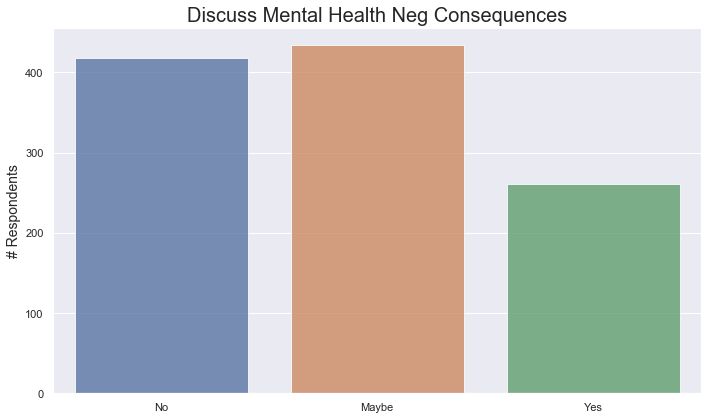

In [19]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(df2['mental_health_consequence'], alpha = .80)
plt.title('Discuss Mental Health Neg Consequences', fontdict={'fontsize':20})
plt.ylabel('# Respondents', fontdict={'fontsize':14})
plt.xlabel('')
save_fig('mental_health_consequences')

### Observations
- At first glance it seems that most people answered no, which means they don't believe that discussing mental health issues with their employer could lead to negative consequences.
- However, there is a significant amoutn of Maybe's which indicates respondents where unsure if it would or not
- for the case of this study, we will group the Yes and Maybe columns together to create a binary classification

### Mental health vs. Phys health

In [20]:
# plot target vs benefits
mental_health_cons_val = df2['mental_health_consequence'].value_counts().to_frame() # create mental health df
mental_health_cons_val.sort_index(ascending=False, axis=0) # sort alhpabetically by index

,mental_health_consequence
Yes,261
No,418
Maybe,434


In [21]:
phys_health_cons_val = df2['phys_health_consequence'].value_counts().to_frame() # create benefits df
phys_health_cons_val.sort_index(ascending=False, axis=0) # sort alphabetically by index

,phys_health_consequence
Yes,49
No,822
Maybe,242


In [22]:
plot_frame = pd.DataFrame(
    data={'Answers': ["Yes", "No", "Maybe"], 
          'Mental': mental_health_cons_val['mental_health_consequence'],
          'Physcial': phys_health_cons_val['phys_health_consequence']}) # create df with dict combining both df
plot_frame


,Answers,Mental,Physcial
Maybe,Yes,434,242
No,No,418,822
Yes,Maybe,261,49


In [23]:
plot_frame = pd.melt(plot_frame, id_vars='Answers', var_name='Mental', value_name='Physical') # melt df
plot_frame


,Answers,Mental,Physical
0,Yes,Mental,434
1,No,Mental,418
2,Maybe,Mental,261
3,Yes,Physcial,242
4,No,Physcial,822
5,Maybe,Physcial,49


Saving figure mental_phys_neg_conseq


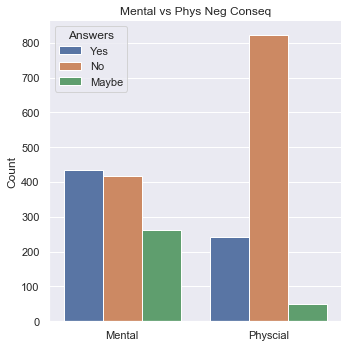

In [24]:
# plot the melted df
sns.set(style='darkgrid')
sns.catplot(x='Mental', y='Physical', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
.set(ylabel='Count', xlabel='', title='Mental vs Phys Neg Conseq')
save_fig('mental_phys_neg_conseq')

### Observations
- Yes is the highest value in mental, showing that respondents felt discussing mental health with their employer would have negative consequence
- No is by far the highest value in physical, showing that there is not as much of a stigma associated with phyisical health as mental

Judging from the extreme difference in how many people answered no to phyiscal as opposed to mental, respondents believe that disscussing mental illness with their employer would have negative consequences, while phyiscal would not as much. 

### Binary Target

In [25]:
# create binary target variable graph
binary_target = df2['mental_health_consequence'].value_counts().to_frame()

# add Yes_Maybe row
binary_target.loc['Yes_Maybe'] = binary_target.loc['Maybe'] + binary_target.loc['Yes']

# drop individual Yes and Maybe rows
binary_target.drop(['Yes', 'Maybe'], inplace=True)
binary_target


,mental_health_consequence
No,418
Yes_Maybe,695


In [26]:
melt_bin_tar = pd.melt(binary_target.reset_index(), id_vars='index')
melt_bin_tar

,index,variable,value
0,No,mental_health_consequence,418
1,Yes_Maybe,mental_health_consequence,695


In [27]:
melt_bin_tar['index'] == 'Yes_Maybe'


0    False
1    True 
Name: index, dtype: bool

Saving figure binary_target


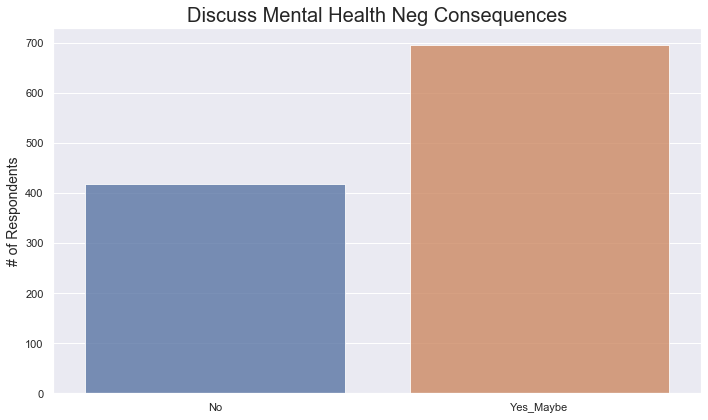

In [28]:
# plot binary target
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=melt_bin_tar['index'], y=melt_bin_tar['value'], alpha = .80)
plt.title('Discuss Mental Health Neg Consequences', fontdict={'fontsize':20})
plt.ylabel('# of Respondents', fontdict={'fontsize':14})
plt.xlabel('')
save_fig('binary_target')


### Mental vs Phys

In [29]:
# Impute Yes and Maybe to Yes_Maybe
df2['mental_health_consequence'] = \
    np.where(df2['mental_health_consequence'] == 'Yes', 'Yes_Maybe',
        np.where(df2['mental_health_consequence'] == 'Maybe', 'Yes_Maybe', df2['mental_health_consequence']))

In [30]:
df2['mental_health_consequence'].value_counts()

Yes_Maybe    695
No           418
Name: mental_health_consequence, dtype: int64

In [31]:
# work interferes vs binary target
work_interfere_yes = df2['work_interfere'].loc[df2['mental_health_consequence'] == 'Yes_Maybe'].value_counts().to_frame()
work_interfere_yes

,work_interfere
Sometimes,287
Never,105
Rarely,94
Often,87


In [32]:
work_intefere_no = df2['work_interfere'].loc[df2['mental_health_consequence'] == 'No'].value_counts().to_frame()
work_intefere_no

,work_interfere
Sometimes,120
Never,84
Rarely,64
Often,29


In [33]:
plot_frame = pd.DataFrame({'mental_health_yes': work_interfere_yes['work_interfere'],
                          'mental_health_no': work_intefere_no['work_interfere']})
plot_frame.index.name = 'Answers'
plot_frame.reset_index(inplace=True)
plot_frame

,Answers,mental_health_yes,mental_health_no
0,Sometimes,287,120
1,Never,105,84
2,Rarely,94,64
3,Often,87,29


In [34]:
plot_frame = pd.melt(plot_frame, id_vars='Answers', var_name='mental_health_yes', value_name='mental_health_no')
plot_frame

,Answers,mental_health_yes,mental_health_no
0,Sometimes,mental_health_yes,287
1,Never,mental_health_yes,105
2,Rarely,mental_health_yes,94
3,Often,mental_health_yes,87
4,Sometimes,mental_health_no,120
5,Never,mental_health_no,84
6,Rarely,mental_health_no,64
7,Often,mental_health_no,29


Saving figure mental_health_int_work


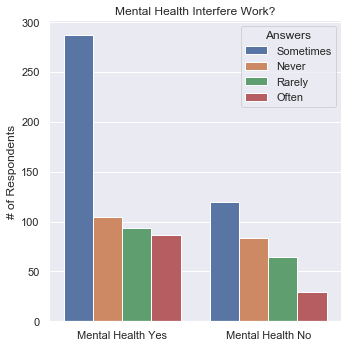

In [35]:
sns.set(style='darkgrid')
sns.catplot(x='mental_health_yes', y='mental_health_no', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
    .set(ylabel='# of Respondents', xlabel='', title='Mental Health Interfere Work?')\
    .set_xticklabels(['Mental Health Yes', 'Mental Health No'])
save_fig('mental_health_int_work');


### Mental Health Neg vs. Supervisor

In [36]:
df2['supervisor'].value_counts()


Yes             449
No              353
Some of them    311
Name: supervisor, dtype: int64

In [37]:
supervisor_yes = df2['supervisor'].loc[df2['mental_health_consequence'] == 'Yes_Maybe'].value_counts().to_frame()
supervisor_yes


,supervisor
No,326
Some of them,230
Yes,139


In [38]:
supervisor_no = df2['supervisor'].loc[df2['mental_health_consequence'] == 'No'].value_counts().to_frame()
supervisor_no


,supervisor
Yes,310
Some of them,81
No,27


In [39]:
plot_frame = pd.DataFrame({'mental_health_yes': supervisor_yes['supervisor'],
                          'mental_health_no': supervisor_no['supervisor']})
plot_frame.index.name = 'Answers'
plot_frame.reset_index(inplace=True)
plot_frame


,Answers,mental_health_yes,mental_health_no
0,No,326,27
1,Some of them,230,81
2,Yes,139,310


In [40]:
plot_frame = pd.melt(plot_frame, id_vars='Answers', var_name='mental_health_yes', value_name='mental_health_no')
plot_frame


,Answers,mental_health_yes,mental_health_no
0,No,mental_health_yes,326
1,Some of them,mental_health_yes,230
2,Yes,mental_health_yes,139
3,No,mental_health_no,27
4,Some of them,mental_health_no,81
5,Yes,mental_health_no,310


Saving figure mental_health_neg_super


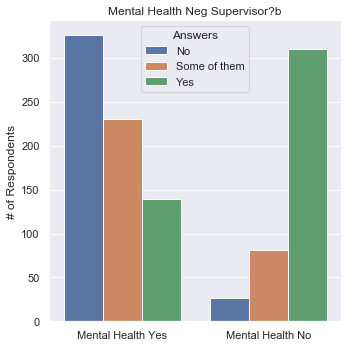

In [41]:
sns.set(style='darkgrid')
sns.catplot(x='mental_health_yes', y='mental_health_no', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
    .set(ylabel='# of Respondents', xlabel='', title='Mental Health Neg Supervisor?b')\
    .set_xticklabels(['Mental Health Yes', 'Mental Health No'])
save_fig('mental_health_neg_super');


### Mental vs Phys Binary

In [42]:
physical_conseq_yes = df2['phys_health_consequence'].loc[df2['mental_health_consequence'] == 'Yes_Maybe'].value_counts().to_frame()
physical_conseq_yes

,phys_health_consequence
No,410
Maybe,236
Yes,49


In [43]:
physical_conseq_no = df2['phys_health_consequence'].loc[df2['mental_health_consequence'] == 'No'].value_counts().to_frame()
physical_conseq_no

,phys_health_consequence
No,412
Maybe,6


In [44]:
plot_frame = pd.DataFrame({'mental_health_yes': physical_conseq_yes['phys_health_consequence'],
                          'mental_health_no': physical_conseq_no['phys_health_consequence']})
plot_frame.index.name = 'Answers'
plot_frame.reset_index(inplace=True)
plot_frame

,Answers,mental_health_yes,mental_health_no
0,Maybe,236,6.0
1,No,410,412.0
2,Yes,49,NaN


In [45]:
plot_frame = pd.melt(plot_frame, id_vars='Answers', var_name='mental_health_yes', value_name='mental_health_no')
plot_frame

,Answers,mental_health_yes,mental_health_no
0,Maybe,mental_health_yes,236.0
1,No,mental_health_yes,410.0
2,Yes,mental_health_yes,49.0
3,Maybe,mental_health_no,6.0
4,No,mental_health_no,412.0
5,Yes,mental_health_no,NaN


Saving figure mental_health_phys_binary


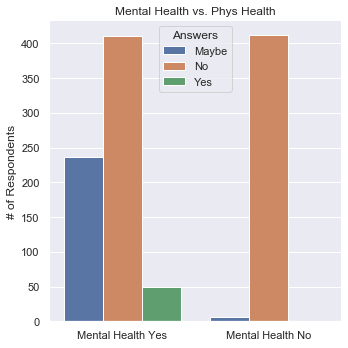

In [46]:
sns.set(style='darkgrid')
sns.catplot(x='mental_health_yes', y='mental_health_no', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
    .set(ylabel='# of Respondents', xlabel='', title='Mental Health vs. Phys Health')\
    .set_xticklabels(['Mental Health Yes', 'Mental Health No'])
save_fig('mental_health_phys_binary');

In [47]:
plot_frame.fillna(value=0, inplace=True)

In [48]:
# get percentage
plot_frame['mental_health_no'] = round(plot_frame['mental_health_no']/sum(plot_frame['mental_health_no']) * 100,2)

In [49]:
plot_frame

,Answers,mental_health_yes,mental_health_no
0,Maybe,mental_health_yes,21.20
1,No,mental_health_yes,36.84
2,Yes,mental_health_yes,4.40
3,Maybe,mental_health_no,0.54
4,No,mental_health_no,37.02
5,Yes,mental_health_no,0.00


Saving figure mental_health_phys_binary_percent


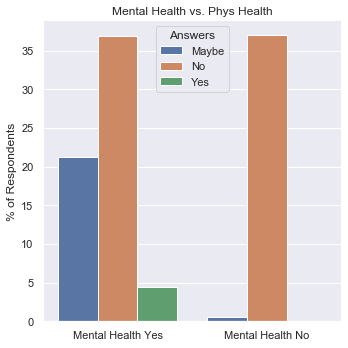

In [50]:
# mental vs. phys percentage
sns.set(style='darkgrid')
sns.catplot(x='mental_health_yes', y='mental_health_no', hue='Answers', data=plot_frame, kind='bar', legend_out=False)\
    .set(ylabel='% of Respondents', xlabel='', title='Mental Health vs. Phys Health')\
    .set_xticklabels(['Mental Health Yes', 'Mental Health No'])
save_fig('mental_health_phys_binary_percent');

### Benefits vs. Binary

In [84]:
benfits_yes = df2['benefits'].loc[df2['mental_health_consequence'] == 'Yes_Maybe'].value_counts().to_frame()
benfits_yes

,benefits
Yes,287
Don't know,213
No,189


In [85]:
benefits_no = df2['benefits'].loc[df2['mental_health_consequence'] == 'No'].value_counts().to_frame()
benefits_no

,benefits
Don't know,163
Yes,163
No,89


In [87]:
benefit_df = pd.DataFrame({'mental_health_yes':benfits_yes['benefits'],
                          'mental_health_no':benefits_no['benefits']})
benefit_df.index.name = 'Answers'
benefit_df.reset_index(inplace=True)
benefit_df

,Answers,mental_health_yes,mental_health_no
0,Don't know,213,163
1,No,189,89
2,Yes,287,163


In [88]:
benefit_df = pd.melt(benefit_df, id_vars='Answers', var_name='mental_health_yes', value_name='mental_health_no')
benefit_df

,Answers,mental_health_yes,mental_health_no
0,Don't know,mental_health_yes,213
1,No,mental_health_yes,189
2,Yes,mental_health_yes,287
3,Don't know,mental_health_no,163
4,No,mental_health_no,89
5,Yes,mental_health_no,163


Saving figure mental_health_benefits


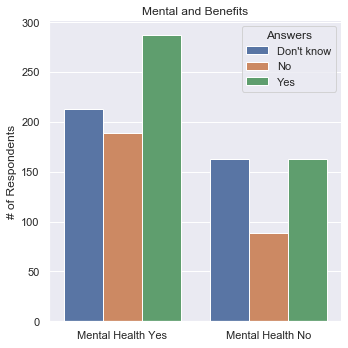

In [89]:
sns.set(style='darkgrid')
sns.catplot(x='mental_health_yes', y='mental_health_no', hue='Answers', data=benefit_df, kind='bar', legend_out=False)\
    .set(ylabel='# of Respondents', xlabel='', title='Mental and Benefits')\
    .set_xticklabels(['Mental Health Yes', 'Mental Health No'])
save_fig('mental_health_benefits');

### Gender

In [51]:
# make all answers lowercase
df2['Gender'] = df2['Gender'].str.lower()

# create three lists male, female and other of all the entries
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
gender_variant = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", 
         "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
         "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]

# use .loc and .isin to map male, female and gender variant to
df2['Gender'].loc[df2['Gender'].isin(male)] = 'male'
df2['Gender'].loc[df2['Gender'].isin(female)] = 'female'
df2['Gender'].loc[df2['Gender'].isin(gender_variant)] = 'gender_variant'

In [52]:
df2['Gender'].value_counts()


male              872
female            225
gender_variant    16 
Name: Gender, dtype: int64

In [53]:
# create its own df
gender_val = df2['Gender'].value_counts().sort_values(ascending=False).to_frame()
gender_val = gender_val.rename(columns={'Gender': 'Counts'})
gender_val


,Counts
male,872
female,225
gender_variant,16


In [54]:
gender_val = pd.melt(gender_val.reset_index(), id_vars='index')
gender_val


,index,variable,value
0,male,Counts,872
1,female,Counts,225
2,gender_variant,Counts,16


Saving figure gender_counts


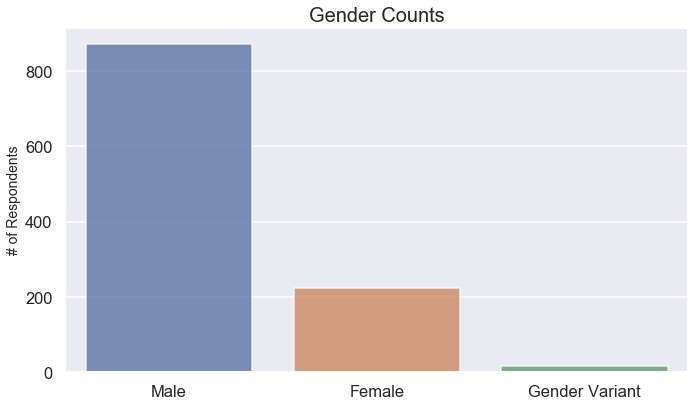

In [55]:
# plot gender count
sns.set('talk')
plt.figure(figsize=(10,6))
sns.barplot(x=gender_val['index'], y=gender_val['value'], alpha = .80)\
.set_xticklabels(['Male', 'Female', 'Gender Variant'])
plt.title('Gender Counts', fontdict={'fontsize':20})
plt.ylabel('# of Respondents', fontdict={'fontsize':14})
plt.xlabel('')
save_fig('gender_counts')


In [56]:
# get percentage
gender_val['value'] = round(gender_val['value']/sum(gender_val['value']) * 100,2)


Saving figure gender_percent


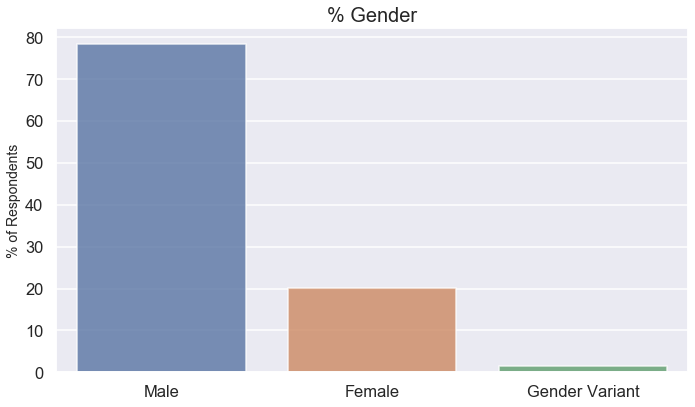

In [57]:
# plot gender percentage
sns.set('talk')
plt.figure(figsize=(10,6))
sns.barplot(x=gender_val['index'], y=gender_val['value'], alpha = .80)\
    .set_xticklabels(['Male', 'Female', 'Gender Variant'])
plt.title('% Gender', fontdict={'fontsize':20})
plt.ylabel('% of Respondents', fontdict={'fontsize':14})
plt.xlabel('')
save_fig('gender_percent')


In [58]:
# gender vs target



### Age

In [59]:
# changes format to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)


In [60]:
df2.describe()


,Age
count,1113.00
mean,30.49
std,53.96
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,329.00


Some odd age numbers, will have to deal with outliers

In [61]:
# Function to find outliers in Age column
def outliers(df):
    '''Takes in a dataframe and returns a list of outliers > 99th and < 1 percentile'''
    outliers = []
    for i in df:
        q1 = np.percentile(df, .5)
        q3 = np.percentile(df, 99.5)
        if i > q3 or i < q1:
            outliers.append(i)
    print("Outliers:", outliers)
    return outliers


In [62]:
age_outliers = outliers(df2['Age'])


Outliers: [-29, 60, 329, 58, 62, -1726, 5, 72, 60]


In [63]:
df2 = df2.loc[~df2['Age'].isin(age_outliers)]


In [64]:
df2.describe()


,Age
count,1104.00
mean,31.75
std,6.92
min,18.00
25%,27.00
50%,31.00
75%,36.00
max,57.00


Saving figure age_hist_no_outliers


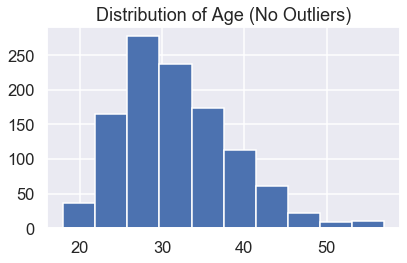

In [65]:
# plt histogram of age no outliers
plt.hist(df2['Age'])
plt.title('Distribution of Age (No Outliers)')
save_fig('age_hist_no_outliers')
plt.show()


### Age and Gender vs. Target

Saving figure age_gender_target


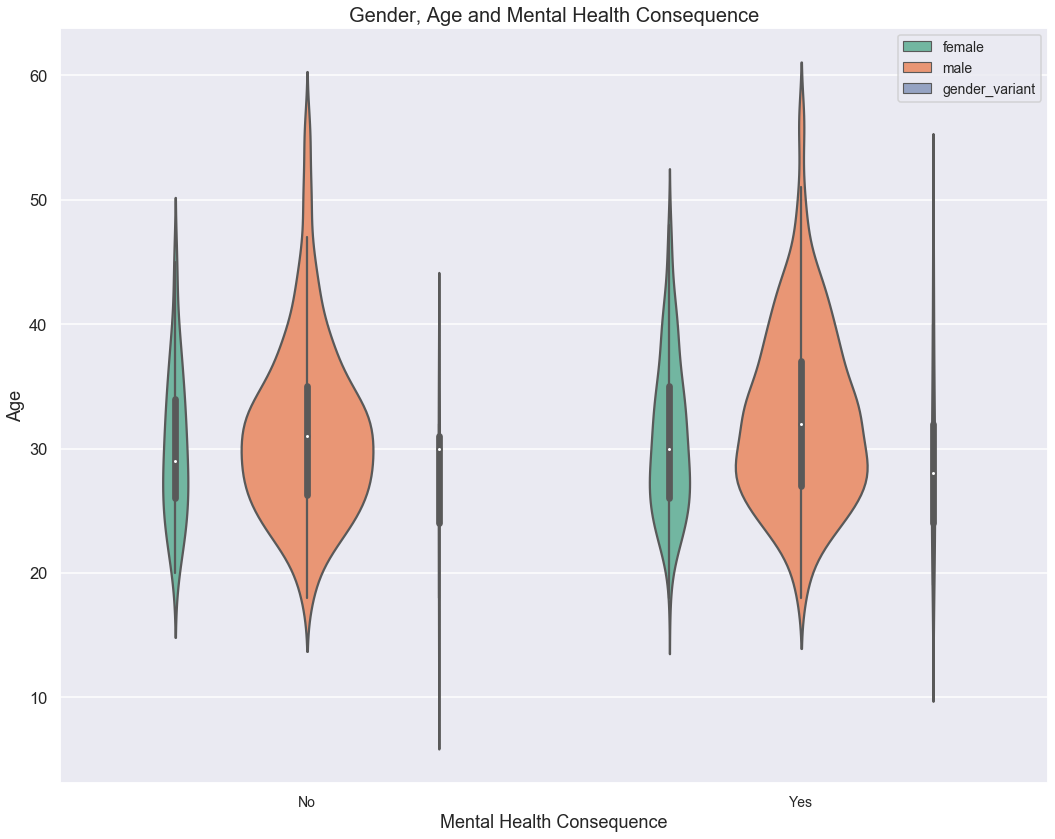

In [66]:
sns.set('talk')
plt.figure(figsize=(15,12))
ax = sns.violinplot(x="mental_health_consequence", y="Age", hue="Gender",
                    data=df2, palette="Set2",
                    scale="count")
ax.set_title('Gender, Age and Mental Health Consequence', fontdict={'fontsize':20})
ax.set_xlabel('Mental Health Consequence')
ax.legend(loc='best', fontsize=14)
ax.set_ylabel('Age')
ax.set_xticklabels(labels=['No','Yes'],fontdict={'fontsize':14})
save_fig('age_gender_target')

### Country

Showcase top 10 countries in dataset

In [67]:
country_count = df2['Country'].value_counts().sort_values(ascending=False).to_frame()[:5]
country_count

,Country
United States,687
United Kingdom,156
Canada,61
Germany,33
Ireland,21


In [68]:
country_count = country_count.rename(columns={'Country': 'count'})
country_count

,count
United States,687
United Kingdom,156
Canada,61
Germany,33
Ireland,21


Saving figure top_5_countries_count


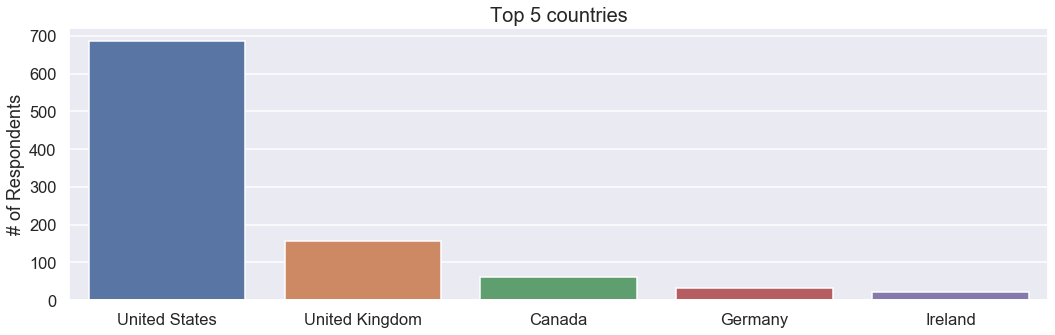

In [69]:
sns.set('talk')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count)
ax.set_title('Top 5 countries', fontdict={'fontsize':20})
ax.set_ylabel('# of Respondents')
save_fig('top_5_countries_count')

In [70]:
# get percentage
country_count['percent'] = round(country_count['count']/sum(country_count['count']) * 100,2)
country_count

,count,percent
United States,687,71.71
United Kingdom,156,16.28
Canada,61,6.37
Germany,33,3.44
Ireland,21,2.19


Saving figure top_5_countries_percent


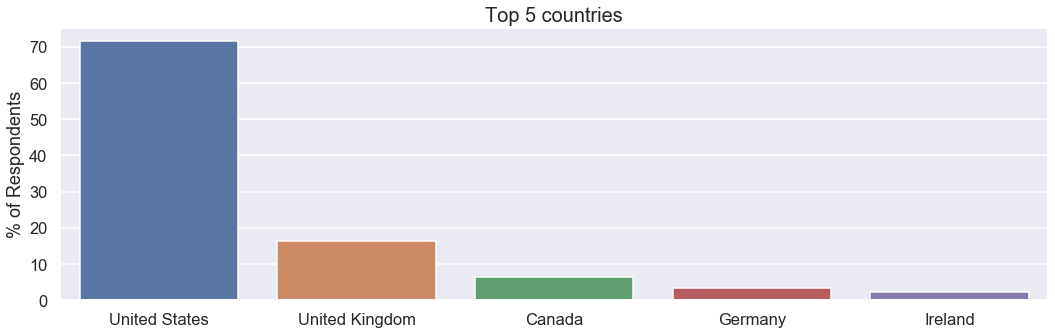

In [71]:
sns.set('talk')
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='percent', data=country_count)
ax.set_title('Top 5 countries', fontdict={'fontsize':20})
ax.set_ylabel('% of Respondents')
save_fig('top_5_countries_percent')

Saving figure top_5_countries_percent_hor


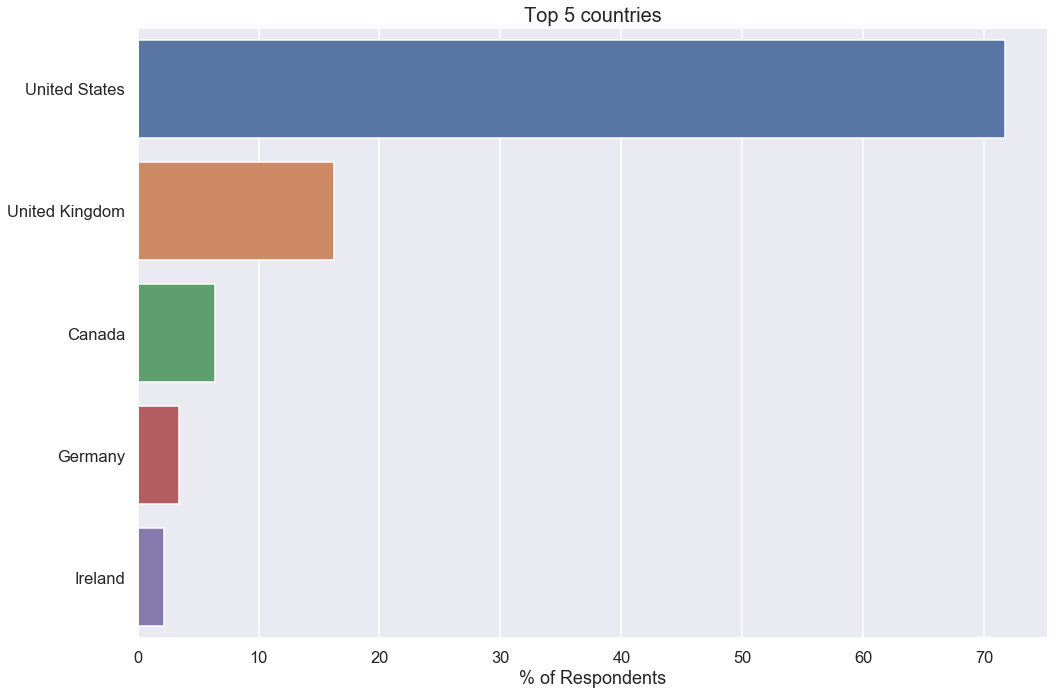

In [72]:
# horizontal
sns.set('talk')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='percent', y=country_count.index, data=country_count, orient='h')
ax.set_title('Top 5 countries', fontdict={'fontsize':20})
ax.set_xlabel('% of Respondents')
save_fig('top_5_countries_percent_hor')

### States

In [73]:
# states df
states_dist = df2['state'].value_counts().sort_values(ascending=False).to_frame()

# change col name to 
states_dist.rename(columns={'state':'count'}, inplace=True)

Saving figure us_states_count


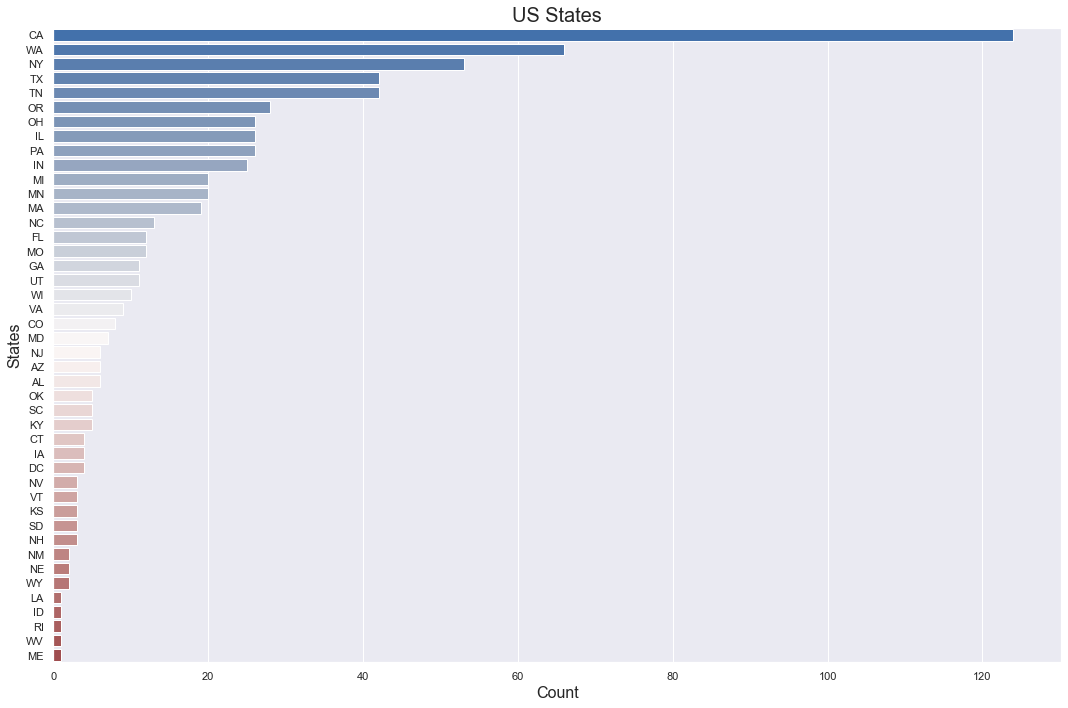

In [74]:
sns.set('notebook')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='count', y=states_dist.index, data=states_dist, orient='h', palette='vlag')
ax.set_ylabel('States', fontdict={'fontsize':16})
ax.set_xlabel('Count', fontdict={'fontsize':16})
ax.set_title('US States', fontdict={'fontsize':20})
save_fig('us_states_count')

In [75]:
# get percentage of states
states_dist['percent'] = round(states_dist['count']/sum(states_dist['count']) * 100,2)

Saving figure us_states_percent


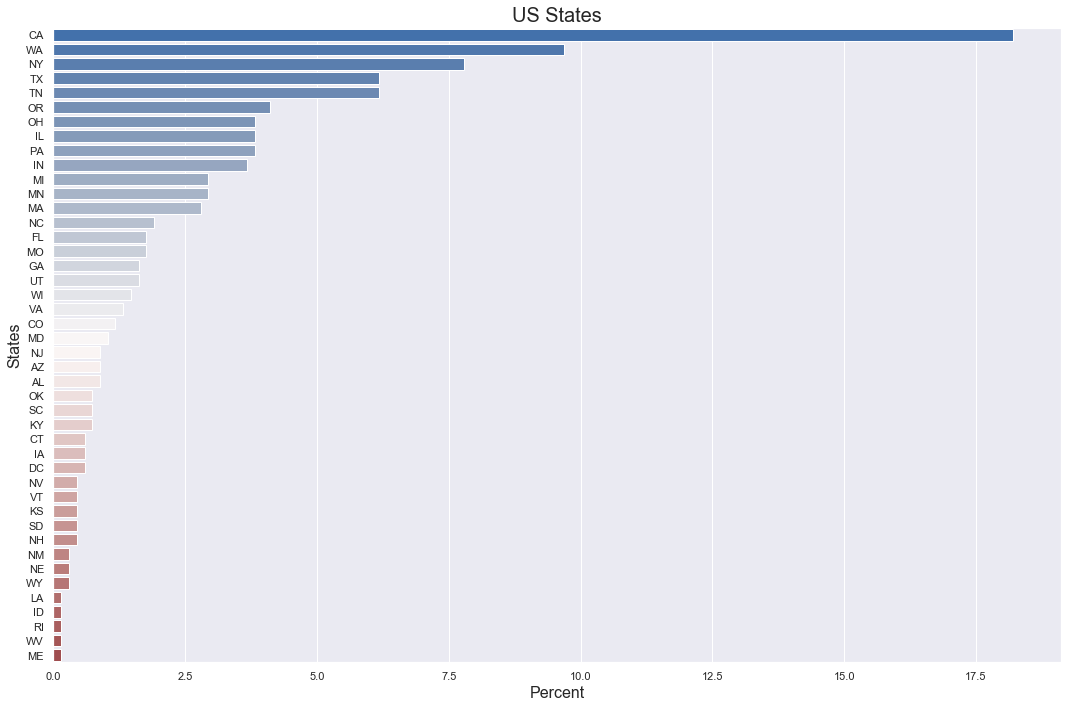

In [76]:
# plot states with percentage
sns.set('notebook')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='percent', y=states_dist.index, data=states_dist, orient='h', palette='vlag')
ax.set_ylabel('States', fontdict={'fontsize':16})
ax.set_xlabel('Percent', fontdict={'fontsize':16})
ax.set_title('US States', fontdict={'fontsize':20})
save_fig('us_states_percent')

In [77]:
states_75 = states_dist[states_dist['percent'] > states_dist['percent'].quantile(0.75)]
states_75

,count,percent
CA,124,18.21
WA,66,9.69
NY,53,7.78
TX,42,6.17
TN,42,6.17
OR,28,4.11
OH,26,3.82
IL,26,3.82
PA,26,3.82
IN,25,3.67


Saving figure us_states_75_percent


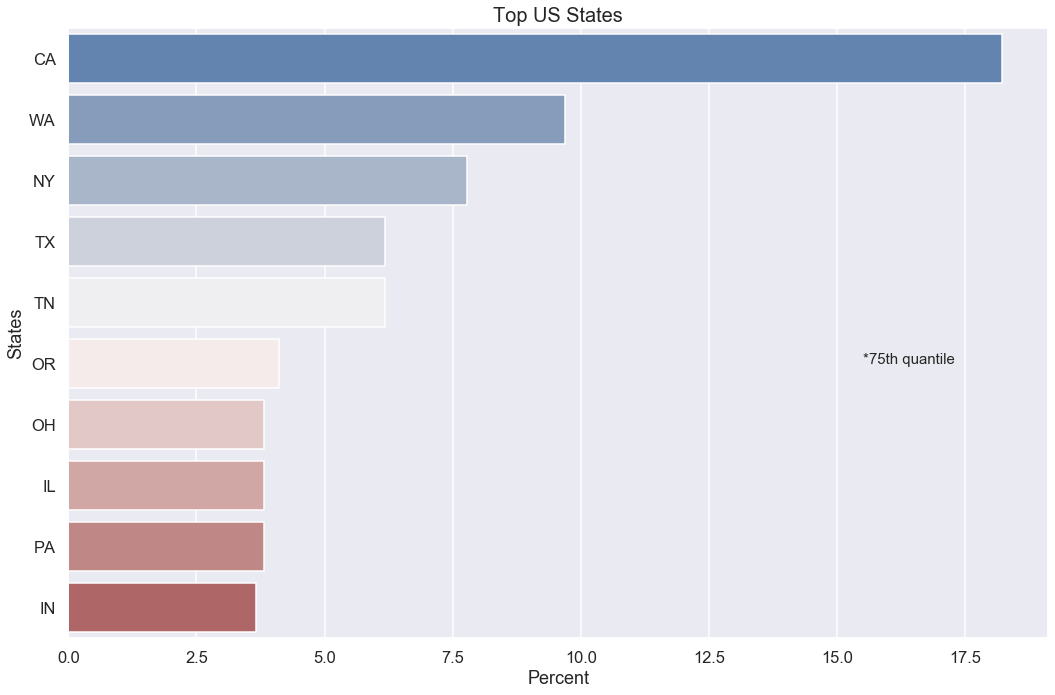

In [78]:
# 75th percentile
sns.set('talk')
plt.figure(figsize=(15,10))
ax = sns.barplot(x='percent', y=states_75.index, data=states_75, orient='h', palette='vlag')
ax.set_ylabel('States')
ax.set_xlabel('Percent')
ax.set_title('Top US States', fontdict={'fontsize':20})
ax.annotate(s='*75th quantile', xy=(15.5,5), size=15)
save_fig('us_states_75_percent')

### Timestamp

In [79]:
# convert timestamp to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])


In [80]:
# create columns for years, months, days, dow, hour to see when majority of surveys were administered
df2['Year'] = df2['Timestamp'].dt.year
df2['Month'] = df2['Timestamp'].dt.month
df2['Day'] = df2['Timestamp'].dt.day
df2['Dow'] = df2['Timestamp'].dt.dayofweek
df2['Hour'] = df2['Timestamp'].dt.hour


In [81]:
df2.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year,Month,Day,Dow,Hour
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,No,Maybe,Yes,No,NaN,2014,8,27,2,11
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,Don't know,No,NaN,2014,8,27,2,11
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,No,No,NaN,2014,8,27,2,11
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Maybe,Maybe,No,Yes,NaN,2014,8,27,2,11
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,...,Yes,Yes,Don't know,No,NaN,2014,8,27,2,11


In [82]:
df2['Month'].value_counts()


8     994
9     46 
2     44 
5     5  
11    4  
4     4  
12    2  
10    2  
7     1  
6     1  
1     1  
Name: Month, dtype: int64